# Azure Computer Vision Handwritten OCR

See <a href="https://github.com/AidanCooper/cloud-API-python-notebooks/blob/master/Azure/ComputerVisionOCR/azure-computer-vision-OCR.ipynb">this notebook</a> for regular Azure Computer Vision OCR.

This notebook provides an implementation of Azure's handwriting-specific variant of its Computer Vision API. This service provides much better performance for handwritten text than the standard text recognition services offered by Azure, AWS, and Google Cloud. This notebook includes a function for overlaying the results on top of the original image. This function is standardised so that it is also compatible with the AWS and Google Cloud alternatives in this repository.

<a href="https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/home">Azure Computer Vision Documentation</a>

In [1]:
import requests
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12, 9)

In [2]:
def azure_handwritten_text(image):
    api_key = 'YOUR API KEY HERE'
    region = 'westeurope'
    with open(image, 'rb') as image_file:
        content = image_file.read()
    headers = dict()
    headers['Content-Type'] = 'application/octet-stream'
    headers['Ocp-Apim-Subscription-Key'] = api_key
    params = {'handwriting' : 'true'}
    response = requests.request('post',
        "https://{}.api.cognitive.microsoft.com/vision/v1.0/RecognizeText".format(region),
        data=content, headers=headers, params=params)
    
    analysis = {}
    while not 'recognitionResult' in analysis:
        response_final = requests.get(response.headers['Operation-Location'], headers=headers)
        analysis = response_final.json()
        time.sleep(1)
    polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]
    
    return polygons

In [3]:
img = 'handwritingsample.png'
result = azure_handwritten_text(img, handwriting=True)

In [4]:
def plot_overlay(img, polygons, remove_long_boxes=False, remove_short_boxes=False,
                 color='k', fontsize=28, alpha=0.3, boxcolor='y'):
    """Function that overlays text labels on original image.
    
    remove_long_boxes (bool) will ignore labels with bounding boxes that are wider
    than half the image width. Depending on the image and the API service being used,
    this may be necessary to prevent overlapping, redundant boxes from being displayed.
    
    remove_short_boxes (bool) will ignore labels with bounding boxes that are thinner
    than a quarter of the image width. Depending on the image and the API service being
    used, this may be necessary to prevent redundant small boxes from being displayed.
    
    The fontsize variable should be manually adjusted to fit the image text size.
    """
    image = Image.open(img)
    ax = plt.imshow(image, alpha=alpha)
    for polygon in polygons:
        vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
        text = polygon[1]
        if remove_long_boxes:
            if vertices[1][0]-vertices[0][0] > image.size[0]/2:
                continue
        if remove_short_boxes:
            if vertices[1][0]-vertices[0][0] < image.size[0]/4:
                continue            
        patch = Polygon(vertices, closed=True, fill=False, linewidth=1, color=boxcolor)
        ax.axes.add_patch(patch)
        plt.text((vertices[0][0]+vertices[2][0])/2,
                 (vertices[0][1]+vertices[2][1])/2,
                  text, fontsize=fontsize, color=color,
                  va="center", ha="center")
    plt.axis("off")
    return

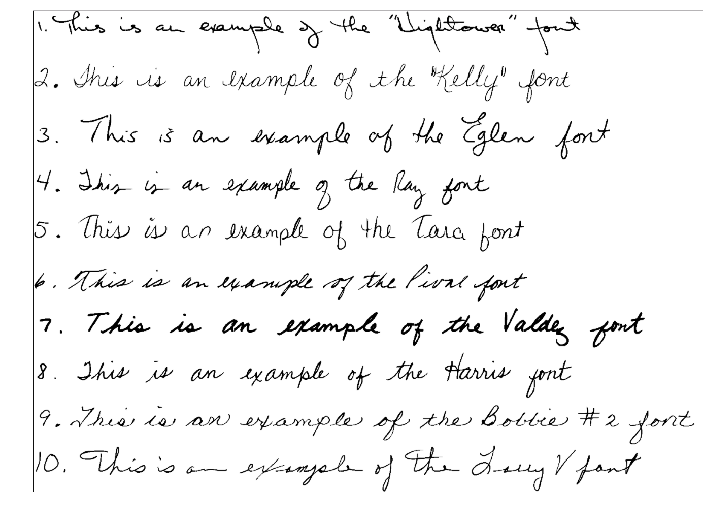

In [5]:
plt.imshow(Image.open(img))
plt.axis('off');

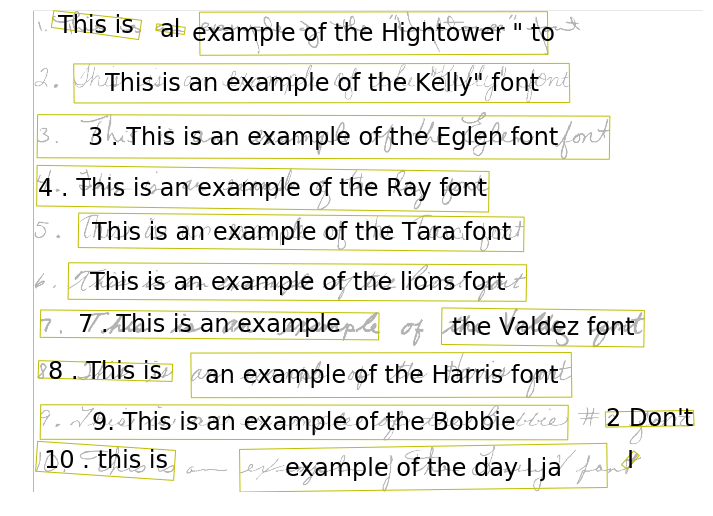

In [6]:
plot_overlay(img, result, fontsize=24)

In [7]:
# Print just the text
for item in result:
    print(item[1])

This is
al
example of the Hightower " to
This is an example of the Kelly" font
3 . This is an example of the Eglen font
4 . This is an example of the Ray font
This is an example of the Tara font
This is an example of the lions fort
7 . This is an example
the Valdez font
8 . This is
an example of the Harris font
9. This is an example of the Bobbie
2 Don't
10 . this is
example of the day I ja
I
